Import Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

pd.set_option("display.max_columns", None)


Load and Combine Datasets

In [6]:
# Load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Combine datasets
dataset = pd.concat([train, test])
data = dataset.copy()

print(data.head(1))
data.info()

  Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   

  Family Name Father's name  Mother's age  Father's age  \
0         NaN         Larre           NaN           NaN   

                               Institute Name  \
0  Boston Specialty & Rehabilitation Hospital   

                               Location of Institute Status  \
0  55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...  Alive   

  Respiratory Rate (breaths/min) Heart Rate (rates/min  Test 1  Test 2  \
0                 Normal (30-60)                Normal     0.0     NaN   

   Test 3  Test 4  Test 5 Parental consent Follow-up Gender Birth asphyxia  \
0     NaN     1.0     0.0              Yes      High    NaN            NaN   

  Autopsy shows birth defect (if applicable) Pl

Display Unique Values

In [7]:
# Function to get unique values of columns
def get_unique_values(df, columns):
    for col in columns:
        print(f"{col} : {df[col].unique()}\n")

# Display unique values
columns = data.columns
get_unique_values(data, columns)

Patient Id : ['PID0x6418' 'PID0x25d5' 'PID0x4a82' ... 'PID0x7927' 'PID0x6660'
 'PID0x966d']

Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]

Genes in mother's side : ['Yes' 'No' nan]

Inherited from father : ['No' 'Yes' nan]

Maternal gene : ['Yes' 'No' nan]

Paternal gene : ['No' 'Yes' nan]

Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 4.82461863 5.05082885 5.04966623]

Patient First Name : ['Richard' 'Mike' 'Kimberly' ... 'Donte' 'Nannie' 'Adelina']

Family Name : [nan 'Hoelscher' 'Stutzman' ... 'Rodrigue' 'Lebron' 'Dilworth']

Father's name : ['Larre' 'Brycen' 'Nashon' ... 'Hillel' 'Anothony' 'Macaleb']

Mother's age : [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]

Father's age : [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 2

Replace Column Values

In [8]:
# Replace column values that represent the same thing with a single value
replace_values = {
    "Birth asphyxia": ['No record', 'Not available'],
    "Autopsy shows birth defect (if applicable)": ['None'],
    "H/O radiation exposure (x-ray)": ['-'],
    "H/O substance abuse": ['-']
}
data.replace(replace_values, value=np.nan, inplace=True)

get_unique_values(data, columns)

Patient Id : ['PID0x6418' 'PID0x25d5' 'PID0x4a82' ... 'PID0x7927' 'PID0x6660'
 'PID0x966d']

Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]

Genes in mother's side : ['Yes' 'No' nan]

Inherited from father : ['No' 'Yes' nan]

Maternal gene : ['Yes' 'No' nan]

Paternal gene : ['No' 'Yes' nan]

Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 4.82461863 5.05082885 5.04966623]

Patient First Name : ['Richard' 'Mike' 'Kimberly' ... 'Donte' 'Nannie' 'Adelina']

Family Name : [nan 'Hoelscher' 'Stutzman' ... 'Rodrigue' 'Lebron' 'Dilworth']

Father's name : ['Larre' 'Brycen' 'Nashon' ... 'Hillel' 'Anothony' 'Macaleb']

Mother's age : [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]

Father's age : [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 2

Drop Irrelevant Columns

In [9]:
# Drop irrelevant columns
columns_to_drop = [
    "Patient Id", "Patient First Name", "Family Name", "Father's name",
    "Mother's age", "Father's age", 'Institute Name', 'Location of Institute',
    'Parental consent', "Place of birth"
]
data.drop(columns=columns_to_drop, inplace=True)

# Drop rows with Null values
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

# Display unique values of the remaining columns
useful_columns = [col for col in data.columns if col not in columns_to_drop]
get_unique_values(data, useful_columns)

Patient Age : [11.  4. 10.  6.  5.  1.  2.  3.  7. 14.  9.  0. 13.  8. 12.]

Genes in mother's side : ['No' 'Yes']

Inherited from father : ['No' 'Yes']

Maternal gene : ['Yes' 'No']

Paternal gene : ['No' 'Yes']

Blood cell count (mcL) : [5.209058   4.75227171 4.75145212 ... 4.91579894 4.74199771 4.96377614]

Status : ['Alive' 'Deceased']

Respiratory Rate (breaths/min) : ['Tachypnea' 'Normal (30-60)']

Heart Rate (rates/min : ['Tachycardia' 'Normal']

Test 1 : [0.]

Test 2 : [0.]

Test 3 : [0.]

Test 4 : [1.]

Test 5 : [0.]

Follow-up : ['Low' 'High']

Gender : ['Male' 'Ambiguous' 'Female']

Birth asphyxia : ['Yes' 'No']

Autopsy shows birth defect (if applicable) : ['Not applicable' 'Yes' 'No']

Folic acid details (peri-conceptional) : ['Yes' 'No']

H/O serious maternal illness : ['Yes' 'No']

H/O radiation exposure (x-ray) : ['No' 'Yes' 'Not applicable']

H/O substance abuse : ['No' 'Not applicable' 'Yes']

Assisted conception IVF/ART : ['No' 'Yes']

History of anomalies in previou

Drop Test Columns

In [10]:
# Drop test columns
data.drop(columns=["Test 1", "Test 2", "Test 3", "Test 4", "Test 5"], inplace=True)


Data Visualizations

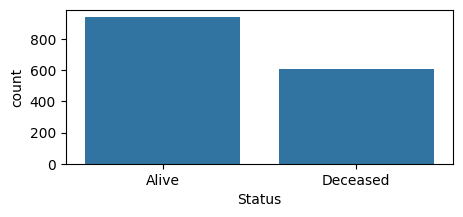

In [12]:
# Plot Mortality
plt.figure(figsize=(5, 2))
sns.countplot(x="Status", data=data)
plt.show()



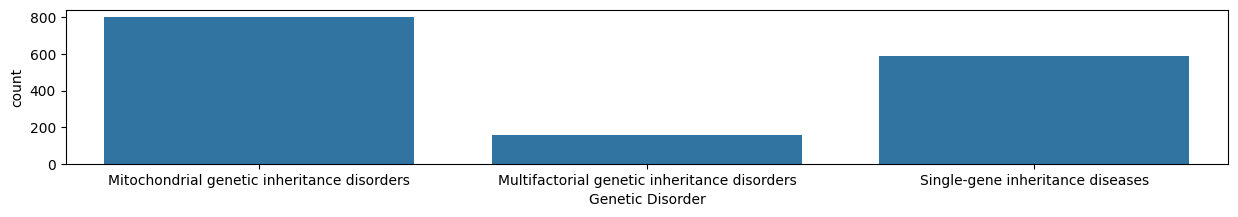

In [13]:
# Plot Genetic Disorder count
plt.figure(figsize=(15, 2))
sns.countplot(x="Genetic Disorder", data=data)
plt.show()



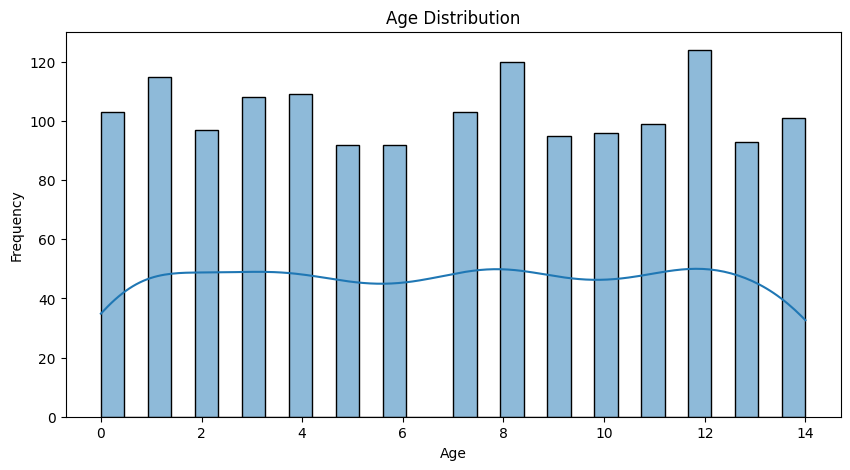

In [14]:

# Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Patient Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



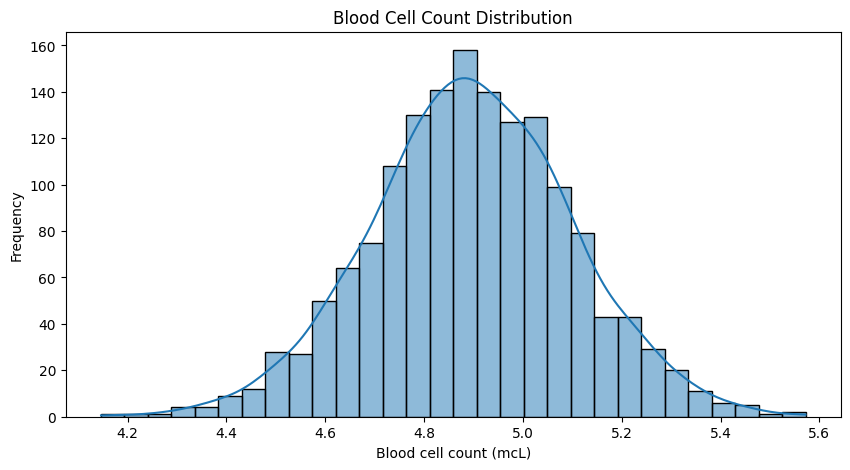

In [16]:
# Blood cell count distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Blood cell count (mcL)'], bins=30, kde=True)
plt.title('Blood Cell Count Distribution')
plt.xlabel('Blood cell count (mcL)')
plt.ylabel('Frequency')
plt.show()



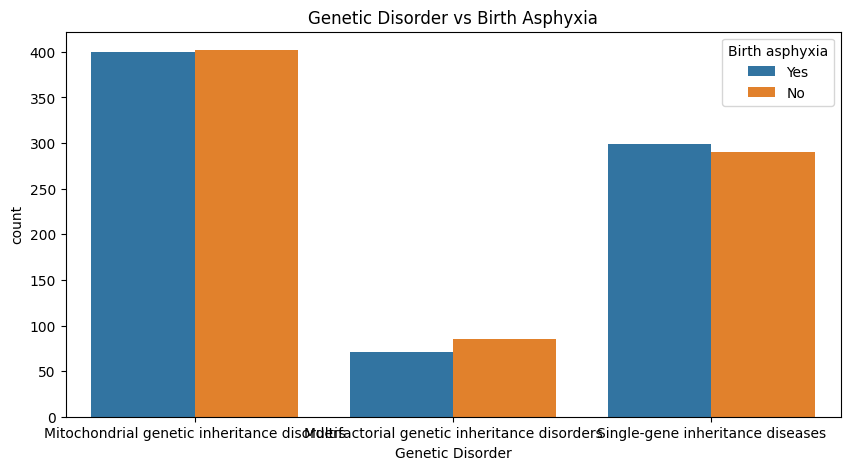

In [18]:

# Relationship between Genetic Disorder and Birth Asphyxia
plt.figure(figsize=(10, 5))
sns.countplot(x="Genetic Disorder", hue="Birth asphyxia", data=data)
plt.title('Genetic Disorder vs Birth Asphyxia')
plt.show()



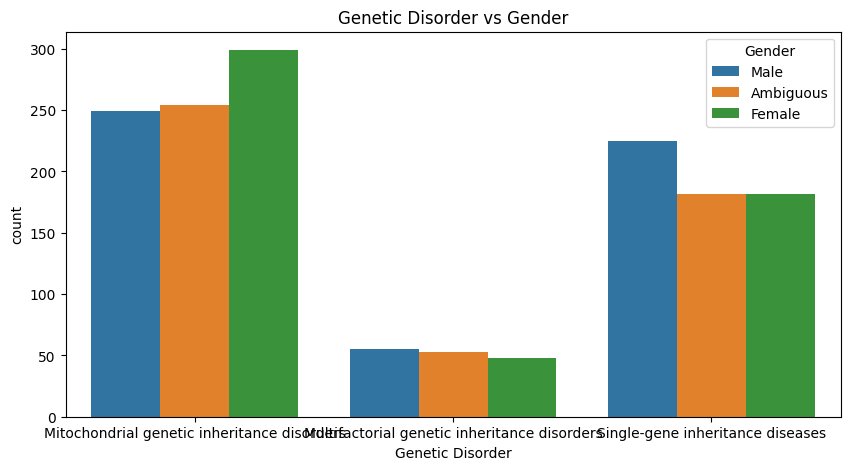

In [19]:
# Relationship between Genetic Disorder and Gender
plt.figure(figsize=(10, 5))
sns.countplot(x="Genetic Disorder", hue="Gender", data=data)
plt.title('Genetic Disorder vs Gender')
plt.show()

Evaluate Models

In [20]:
# Function to evaluate models
def evaluate_models(X, y):
    models = {
        'GaussianNB': GaussianNB(),
        'SVC': SVC(),
        'RandomForest': RandomForestClassifier(),
        'LogisticRegression': LogisticRegression(max_iter=1000),
        'KNeighbors': KNeighborsClassifier()
    }

    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=6)
        print(f'{name} = {scores.mean():.4f} ± {scores.std():.4f}')

# Predicting Genetic Disorder
X1 = pd.get_dummies(data.drop("Genetic Disorder", axis=1))
Y1 = data["Genetic Disorder"]
evaluate_models(X1, Y1)

# Predicting Disorder Subclass
X2 = pd.get_dummies(data.drop("Disorder Subclass", axis=1))
Y2 = data["Disorder Subclass"]
evaluate_models(X2, Y2)


GaussianNB = 1.0000 ± 0.0000
SVC = 0.9858 ± 0.0048
RandomForest = 0.9981 ± 0.0030
LogisticRegression = 0.9987 ± 0.0018
KNeighbors = 0.6290 ± 0.0295
GaussianNB = 0.6432 ± 0.0150
SVC = 0.6645 ± 0.0262
RandomForest = 0.6568 ± 0.0340
LogisticRegression = 0.7201 ± 0.0134
KNeighbors = 0.3743 ± 0.0300


Train and Evaluate Models

In [23]:
# Function for further actions to increase model accuracy
def train_and_evaluate(X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=40, train_size=0.85)

    models = {
        'GaussianNB': GaussianNB(),
        'SVC': SVC(),
        'RandomForest': RandomForestClassifier(),
        'LogisticRegression': LogisticRegression(max_iter=1000),
        'KNeighbors': KNeighborsClassifier()
    }

    for name, model in models.items():
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        score = accuracy_score(ypred, ytest)
        print(f'{name} score: {score:.4f}')

# Train and evaluate models for Disorder Subclass prediction
train_and_evaluate(X2, Y2)



GaussianNB score: 0.6824
SVC score: 0.7210
RandomForest score: 0.7082
LogisticRegression score: 0.7854
KNeighbors score: 0.4721


Test Data Prediction

In [26]:
# Load test data
test_data = pd.read_csv("test.csv")

# Preprocess test data similarly to training data
test_data.replace(replace_values, value=np.nan, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=["Test 1", "Test 2", "Test 3", "Test 4", "Test 5"], inplace=True)
test_data.dropna(inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Prepare test data for prediction
X_test = pd.get_dummies(test_data)

# Ensure test data has the same columns as training data
X_test = X_test.reindex(columns=X2.columns, fill_value=0)

# Predict using the best model (example: RandomForestClassifier)
best_model = LogisticRegression()
best_model.fit(X2, Y2)  # Assuming Y2 as the target for the final model
test_predictions = best_model.predict(X_test)

# Print predictions
print(test_predictions)


['Cancer' 'Diabetes' 'Tay-Sachs' 'Cancer' 'Leigh syndrome' 'Tay-Sachs'
 'Cancer' 'Diabetes' 'Tay-Sachs' 'Diabetes' 'Cancer'
 'Mitochondrial myopathy' 'Cancer' 'Cancer' 'Cancer' 'Leigh syndrome'
 'Diabetes' 'Diabetes' 'Diabetes' 'Tay-Sachs' 'Cancer'
 'Mitochondrial myopathy' 'Diabetes' 'Cancer' 'Cancer' 'Diabetes'
 'Diabetes' 'Cancer' 'Mitochondrial myopathy' 'Diabetes' 'Cancer' 'Cancer'
 'Tay-Sachs' 'Cancer' 'Cancer' 'Mitochondrial myopathy' 'Leigh syndrome'
 'Cancer' 'Mitochondrial myopathy' 'Cancer' 'Mitochondrial myopathy'
 'Leigh syndrome' 'Diabetes' 'Leigh syndrome' 'Diabetes' 'Cancer'
 'Diabetes' 'Diabetes' 'Cancer' 'Cancer' 'Leigh syndrome' 'Leigh syndrome'
 'Diabetes' 'Tay-Sachs' 'Cancer' 'Tay-Sachs' 'Leigh syndrome' 'Cancer'
 'Diabetes' 'Diabetes' 'Tay-Sachs' 'Tay-Sachs' 'Cancer' 'Cancer'
 'Diabetes' 'Cancer' 'Cancer' 'Diabetes' 'Diabetes' 'Tay-Sachs'
 'Leigh syndrome' 'Mitochondrial myopathy' 'Leigh syndrome' 'Cancer'
 'Diabetes' 'Mitochondrial myopathy' 'Cancer' 'Diabetes' '